# R workshop
authors: 
* Christian Wanschers 
* Bastiaan Verheul
* Nino van Alphen
* Sara Eftekhar Azam


# Introduction
In this workshop, we are going to learn you the basics of R and its statistical capabilities!

## Loading packages
First, we have to install some packages.
The packages we are going to use are:

* `Tidyverse`: A collection of a(r)R packages designed for data science. It includes some example datasets too.
* `ggplot2`: Used for creating elegant data visualizations.
* `dplyr`: Provides a set of functions for data manipulation tasks such as filtering, grouping, summarizing, and mutating data frames.
* `magrittr`: Provides the pipe operator %>%, which allows you to chain together multiple operations.

All packages can be directly installed by running them in a .R-file or a codeblock below:

In [1]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("magrittr")

Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Christian\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Christian\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Christian\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll to C:\Users\Christian\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


After installing the packages, we should include or import them to be able to use them later. This can be done in 2 ways. **Both** options, however there is a small difference:

* `require(<libname>)`: will output a warning if a package is not installed and then continue to execute the code.
* `library(<libname>)`: will output an error and stop the execution of the code.

In [39]:
# library(tidyverse)
library(ggplot2)
library(dplyr)
library(magrittr)
library(tidyverse)

# Demo 1: EDA

## Loading data and initial exploring dataset
The packages we are utilizing contain a variety of valuable datasets that can be utilized. To access these datasets, execute the following code snippet:

In [5]:
data(package = "ggplot2")

Data sets in package 'ggplot2':

diamonds                Prices of over 50,000 round cut diamonds
economics               US economic time series
economics_long          US economic time series
faithfuld               2d density estimate of Old Faithful data
luv_colours             'colors()' in Luv space
midwest                 Midwest demographics
mpg                     Fuel economy data from 1999 to 2008 for 38
                        popular models of cars
msleep                  An updated and expanded version of the mammals
                        sleep dataset
presidential            Terms of 12 presidents from Eisenhower to Trump
seals                   Vector field of seal movements
txhousing               Housing sales in TX

we will be utilizing the `Bachelor_Degrees_Majors.csv` dataset, which contains information regarding the enrollment of college students in various states across the US. We can import the dataset with code:


In [6]:
data <- read.csv("Bachelor_Degrees_Majors.csv")

Let's show the first few rows using the `head()` function:

In [7]:
head(data)

,State,Sex,Age.Group,Bachelor.s.Degree.Holders,Science.and.Engineering,Science.and.Engineering.Related.Fields,Business,Education,Arts..Humanities.and.Others
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
2,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
3,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
4,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
5,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"
6,Alabama,Male,25 to 39,"117,794","50,188","7,712","29,859","6,357","23,678"


We need to convert the character variables to factors, we also need to remove the commas by converting the columns to numeric type. We can do this with code:


In [8]:
numeric_cols <- c("Bachelor.s.Degree.Holders", "Science.and.Engineering", "Science.and.Engineering.Related.Fields", "Business", "Education", "Arts..Humanities.and.Others")
data[, numeric_cols] <- lapply(data[, numeric_cols], function(x) as.numeric(gsub(",", "", x)))

Why not just copy/paste the columnname? This is because of naming convention used in (a)R(rr). A string may contain:
* letters
* numbers
* dots
* underscores
* but it does **NOT** allow **spaces** and **apostrophes**, they are automagically replaced with a dot (or in older versions of R they may be replaced by an underscore)

When you read a .CSV-file, R will automagically convert them to syntactically valid names!

Total is redundant so we should remove rows with Sex=Total. 

In [9]:
# in dataset, we have male, female, and total (which is sum of male and female). SO, rows with Sex == "Total" are redudant. Since we don't want to show them in our plots, we remove them.
data <- data %>%
  filter(Sex != "Total")

In [10]:
# View the first few rows of the dataset
head(data)

,State,Sex,Age.Group,Bachelor.s.Degree.Holders,Science.and.Engineering,Science.and.Engineering.Related.Fields,Business,Education,Arts..Humanities.and.Others
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,Male,25 and older,405618,159366,26004,113909,29490,76849
2,Alabama,Male,25 to 39,117794,50188,7712,29859,6357,23678
3,Alabama,Male,40 to 64,184328,67977,12331,54931,12820,36269
4,Alabama,Male,65 and older,103496,41201,5961,29119,10313,16902
5,Alabama,Female,25 and older,479739,104189,72441,96238,111581,95290
6,Alabama,Female,25 to 39,151130,40548,24666,28656,22985,34275


In [11]:
# Display the structure of the dataset
str(data)

'data.frame':	408 obs. of  9 variables:
 $ State                                 : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ Sex                                   : chr  "Male" "Male" "Male" "Male" ...
 $ Age.Group                             : chr  "25 and older" "25 to 39" "40 to 64" "65 and older" ...
 $ Bachelor.s.Degree.Holders             : num  405618 117794 184328 103496 479739 ...
 $ Science.and.Engineering               : num  159366 50188 67977 41201 104189 ...
 $ Science.and.Engineering.Related.Fields: num  26004 7712 12331 5961 72441 ...
 $ Business                              : num  113909 29859 54931 29119 96238 ...
 $ Education                             : num  29490 6357 12820 10313 111581 ...
 $ Arts..Humanities.and.Others           : num  76849 23678 36269 16902 95290 ...


In [12]:
# Summary statistics for numerical variables
summary(data)

    State               Sex             Age.Group        
 Length:408         Length:408         Length:408        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 Bachelor.s.Degree.Holders Science.and.Engineering
 Min.   :  13067           Min.   :   1629        
 1st Qu.:  73831           1st Qu.:  22405        
 Median : 181667           Median :  55263        
 Mean   : 365204           Mean   : 129276        
 3rd Qu.: 433020           3rd Qu.: 150703        
 Max.   :4868520           Max.   :2275829        
 Science.and.Engineering.Related.Fields    Business        Education     
 Min.   :   623                         Min.   :   959   Min.   :   461  
 1st Qu.:  6755                         1st Qu.: 12428   1st Qu.:  7913  
 Median : 16187

# Assignment 1: EDA

## Group, filter, and plot data
In R, grouping is similar to utilizing the `GROUP BY` clause in SQL, while filtering is akin to applying conditions with the `WHERE` clause in SQL. 

Creating plots in R is straightforward and user-friendly. 

For our current task, we will create a visualization comparing `Science and Engineering` with `Business` using the `ggplot` library. This library allows for the addition of multiple elements to the plot through color differentiation.

Lets view the result of code below:

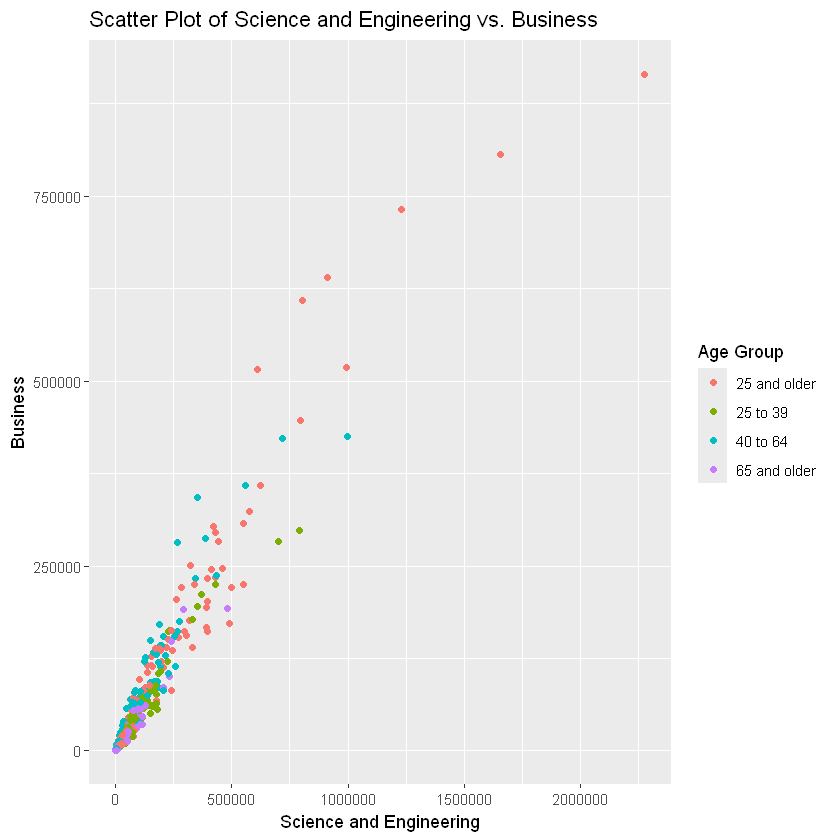

In [13]:
ggplot(data, aes(x = Science.and.Engineering, y = Business, color = Age.Group)) +
  geom_point() +  # Add points for each data point
  scale_color_discrete(name = "Age Group") +  # Custom color legend title
  labs(x = "Science and Engineering", y = "Business") +  # Labels for x and y axes
  ggtitle("Scatter Plot of Science and Engineering vs. Business")  # Title for the plot

What did the code do? 
1. `ggplot` is called, `data` passed in with on the X and Y axis the 2 columns. `Age` is used as the color differentiator.
2. A few parameters are called in `ggplot()`:
   * `geom_point()`: creates the scatterplot including the datapoints
   * `scale_color_discrete()`: Within this function you can set the name of the legend
   * `labs()`: Sets custom labels for the axes
   * `ggtitle()`: Title of the whole graph

# Extra Assignment: EDA
Using above code as example, create a plot for a diamond carot vs its price and show its cut as color (or any other plot of your choice).

We are going to learn how to do these by doing some example tasks.

## Task 1
Compare the average Sicence and Engineering for different age groups.
Only consider Female students.
Plot bar chart to show the results. 

Let's do this with pipe %>% operator:

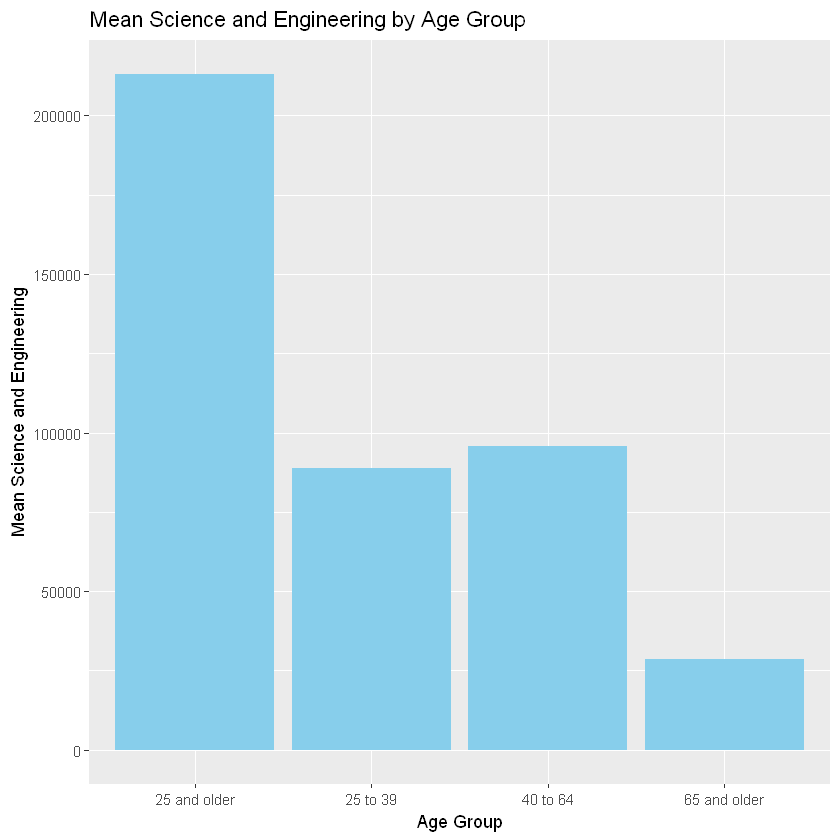

In [14]:
task1 <- data %>% 
  filter(Sex == "Female") %>%
  group_by(Age.Group) %>%
  summarise(mean_sci = mean(Science.and.Engineering))

ggplot(task1, aes(x = Age.Group, y = mean_sci)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Age Group", y = "Mean Science and Engineering") +
  ggtitle("Mean Science and Engineering by Age Group")

## Task 2:
Plot Business and Education in a scatter plot for age group 25 to 39 and Sex of Male.


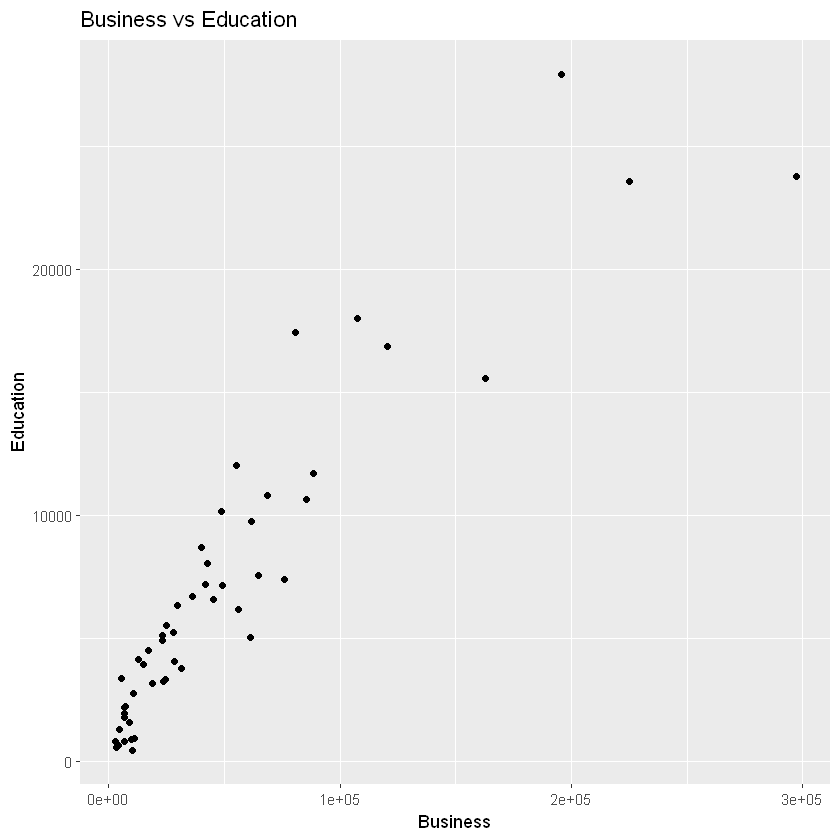

In [15]:
task2 = data %>% filter(Age.Group == "25 to 39" & Sex == "Male")
ggplot(task2, aes(x = Business, y = Education)) +
  geom_point() +  # Add points
  labs(x = "Business", y = "Education") +
  ggtitle("Business vs Education")

# Demo 2: Regression

We are going to analyse the relationship between the number of `Bachelors's degree holders` and the number of `Science and Engineering` using a linear regression model. 

First select the columns to be used in the model:

In [16]:
# Select relevant columns
selected_data <- data[, c("Bachelor.s.Degree.Holders", "Science.and.Engineering")]

Convert the data to a dataframe using `as.data.frame()`:

In [17]:
selected_data <- as.data.frame(selected_data)

Split the data into training, testing and validation:

In [18]:
set.seed(123)  # For reproducibility
sample_index <- sample(seq_len(nrow(data)), 0.7 * nrow(data))
train_data <- data[sample_index, ]
test_data <- data[-sample_index, ]

Now learn the actual model:

In [19]:
model <- lm(Bachelor.s.Degree.Holders ~ Science.and.Engineering, data = train_data)

Just like that? Yep, just like that. the `lm` part determines what model-algorithm is used. `lm` stands for "linear model".

We can show the performance of the model:

In [20]:
summary(model)


Call:
lm(formula = Bachelor.s.Degree.Holders ~ Science.and.Engineering, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-870646  -62434  -43635   15500 1029806 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.262e+04  1.082e+04   5.787  1.9e-08 ***
Science.and.Engineering 2.359e+00  4.282e-02  55.078  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 156800 on 283 degrees of freedom
Multiple R-squared:  0.9147,	Adjusted R-squared:  0.9144 
F-statistic:  3034 on 1 and 283 DF,  p-value: < 2.2e-16


The `summary()` shows that the model has scored an adjusted $R^2$ of 0.9209

We can optionally calculate the MSE:

In [21]:
predictions <- predict(model, test_data)
mse <- mean((predictions - test_data$Bachelor.s.Degree.Holders)^2)
print(paste("Mean Squared Error:", mse))

[1] "Mean Squared Error: 22991055746.6111"


Using `ggplot`, we can also scatterplot the columns and include the regression line in 1 go:

`geom_smooth()` using formula = 'y ~ x'


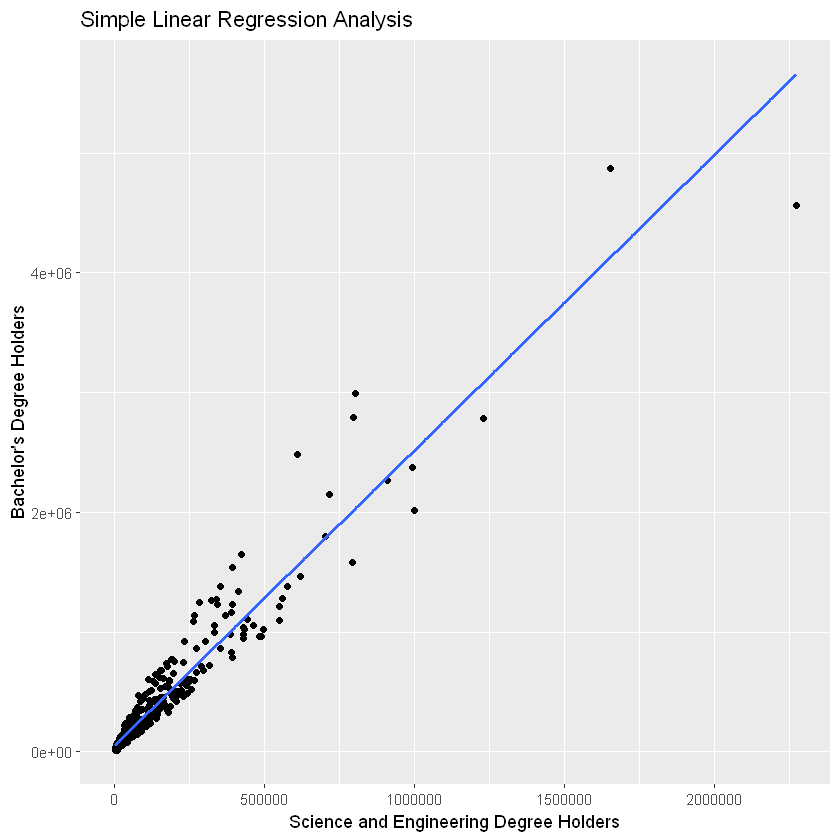

In [22]:
# Scatter plot with regression line
ggplot(selected_data, aes(x = Science.and.Engineering, y = Bachelor.s.Degree.Holders)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Simple Linear Regression Analysis",
       x = "Science and Engineering Degree Holders",
       y = "Bachelor's Degree Holders")

# Assignment 2: Regression

Instead of using a linear regression model, now it's up to you to make use of another regression model. Lets try Random Forest Regression this time. Feel free to add more blocks as required.

In [23]:
# Install the required package
install.packages("randomForest")

Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


In [ ]:
# Import the randomForest library

: 

In [ ]:
# Pick 2 different columns from the dataset and convert them to numeric value

: 

In [ ]:
# Select the columns for regression and store in a variable

: 

In [ ]:
# Train the RandomForest model

: 

# Demo 3: Classification

In this section, we will demonstrate how to perform classification using a simple decision tree classifier. We will predict the field of study (e.g., 'Science and Engineering', 'Business', etc.) based on the number of bachelor's degree holders. 

First, we need to install and load the required package `rpart` for creating decision trees.

In [24]:
install.packages("rpart")
library(rpart)

Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Christian\AppData\Local\R\win-library\4.4\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\Christian\AppData\Local\R\win-library\4.4\rpart\libs\x64\rpart.dll: Permission denied"
Warning message:
"restored 'rpart'"



The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


Next, let's prepare our dataset. We will use the `data` object that was created earlier. We will select relevant columns and create a new categorical column for classification. For simplicity, we will create a binary classification problem by categorizing the `Science and Engineering` field into 'High' and 'Low' based on the median value.

In [25]:
# Create a binary classification target variable
median_sci_eng <- median(data$Science.and.Engineering, na.rm = TRUE)
data$SciEng_Category <- ifelse(data$Science.and.Engineering >= median_sci_eng, "High", "Low")

# Convert the new column to a factor
data$SciEng_Category <- as.factor(data$SciEng_Category)

Let's display the first few rows of the modified dataset to ensure our new column has been added correctly.

In [26]:
head(data)

,State,Sex,Age.Group,Bachelor.s.Degree.Holders,Science.and.Engineering,Science.and.Engineering.Related.Fields,Business,Education,Arts..Humanities.and.Others,SciEng_Category
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Alabama,Male,25 and older,405618,159366,26004,113909,29490,76849,High
2,Alabama,Male,25 to 39,117794,50188,7712,29859,6357,23678,Low
3,Alabama,Male,40 to 64,184328,67977,12331,54931,12820,36269,High
4,Alabama,Male,65 and older,103496,41201,5961,29119,10313,16902,Low
5,Alabama,Female,25 and older,479739,104189,72441,96238,111581,95290,High
6,Alabama,Female,25 to 39,151130,40548,24666,28656,22985,34275,Low


Next, let's split the dataset into training and testing sets. 70% of the data will be used for training and the remaining 30% for testing.

In [27]:
set.seed(123)  # For reproducibility
sample_index <- sample(seq_len(nrow(data)), size = 0.7 * nrow(data))
train_data <- data[sample_index, ]
test_data <- data[-sample_index, ]

We can now train the decision tree classifier using the `rpart` function, with `SciEng_Category` as the target variable and `Bachelor's Degree Holders` as the predictor.

In [28]:
# Train the decision tree classifier
model <- rpart(SciEng_Category ~ Bachelor.s.Degree.Holders, data = train_data, method = "class")

Let's visualize the decision tree.

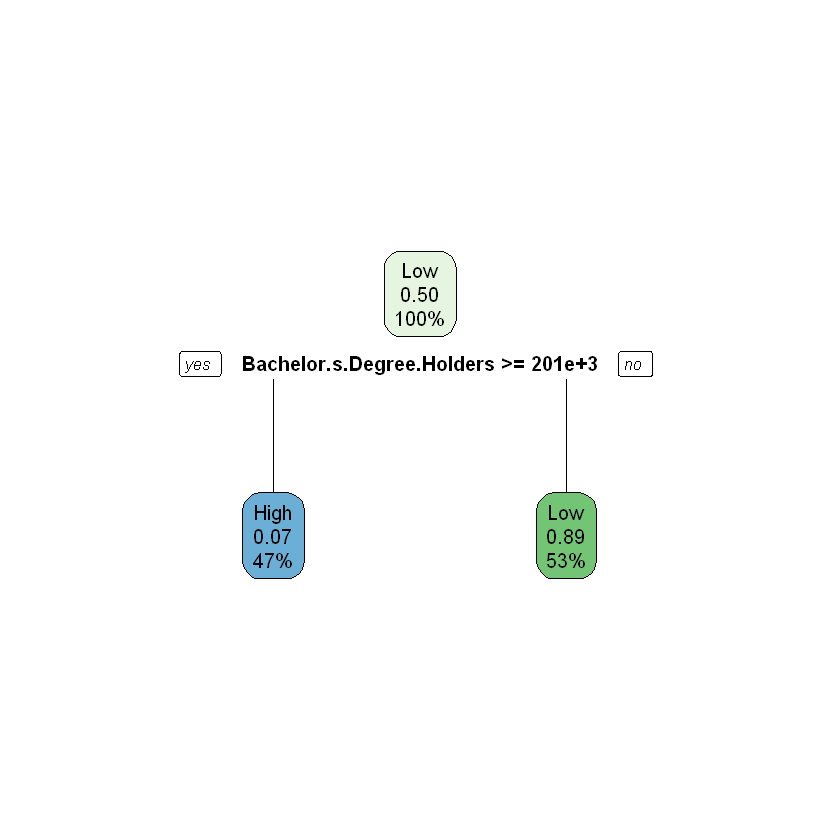

In [29]:
library(rpart.plot)
rpart.plot(model)

Now, let's make predictions on the test set and evaluate the model's performance.

In [30]:
# Make predictions on the test set
predictions <- predict(model, test_data, type = "class")

# Evaluate the model's performance
confusion_matrix <- table(Predicted = predictions, Actual = test_data$SciEng_Category)
print(confusion_matrix)

         Actual
Predicted High Low
     High   51   3
     Low    11  58


The confusion matrix shows how well the model performs.

To calculate the accuracy of the model, we can use the following code:

In [31]:
# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

[1] "Accuracy: 88.62 %"


We have successfully built and evaluated a decision tree classifier.

# Assignment 3: Classification

Using the code from the demo as an example, create a classification model using a different algorithm, such as k-Nearest Neighbors (k-NN) or Random Forest. Choose another categorical target variable and appropriate predictor variables from the dataset. Feel free to add more code blocks.

In [32]:
# Install the required package for k-NN
install.packages("class")

Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages


In [ ]:
# Import the class library for k-NN

: 

In [ ]:
# Prepare the dataset for k-NN classification

: 

# Demo 4: Clustering

R even has the ability to do clustering, we are going to show you how to do `HDBSCAN`!

It requires just 1 extra package. code below installs and imports the required `dbscan` package:

In [33]:
install.packages("dbscan")
library(dbscan)

Installing package into 'C:/Users/Christian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dbscan' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dbscan'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Christian\AppData\Local\R\win-library\4.4\00LOCK\dbscan\libs\x64\dbscan.dll to C:\Users\Christian\AppData\Local\R\win-library\4.4\dbscan\libs\x64\dbscan.dll: Permission denied"
Warning message:
"restored 'dbscan'"



The downloaded binary packages are in
	C:\Users\Christian\AppData\Local\Temp\Rtmps77jP4\downloaded_packages



Attaching package: 'dbscan'


The following object is masked from 'package:stats':

    as.dendrogram




Since we already prepared the dataset we can skip the preprocessing, selecting the correct columns and storing as a dataframe but just to be sure here is the complete code to do all that in 1 block:

In [34]:
# Convert necessary columns to numeric
data$Science.and.Engineering <- as.numeric(gsub(",", "", data$Science.and.Engineering))
data$Business <- as.numeric(gsub(",", "", data$Business))
data <- na.omit(data)  # Remove any rows with NA values

# Select columns for clustering
selected_data <- data[, c("Science.and.Engineering", "Business")]

Run the actual `HDBSCAN`:

In [35]:
hdbscan_result <- hdbscan(selected_data, minPts = 5)

Print the result:

In [36]:
print(hdbscan_result)

HDBSCAN clustering for 408 objects.
Parameters: minPts = 5
The clustering contains 9 cluster(s) and 190 noise points.

  0   1   2   3   4   5   6   7   8   9 
190  10   6 113  30  22   7   9  10  11 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc


Add cluster information to the data:

In [37]:
data$cluster <- as.factor(hdbscan_result$cluster)

Plot the result using the same function as before:

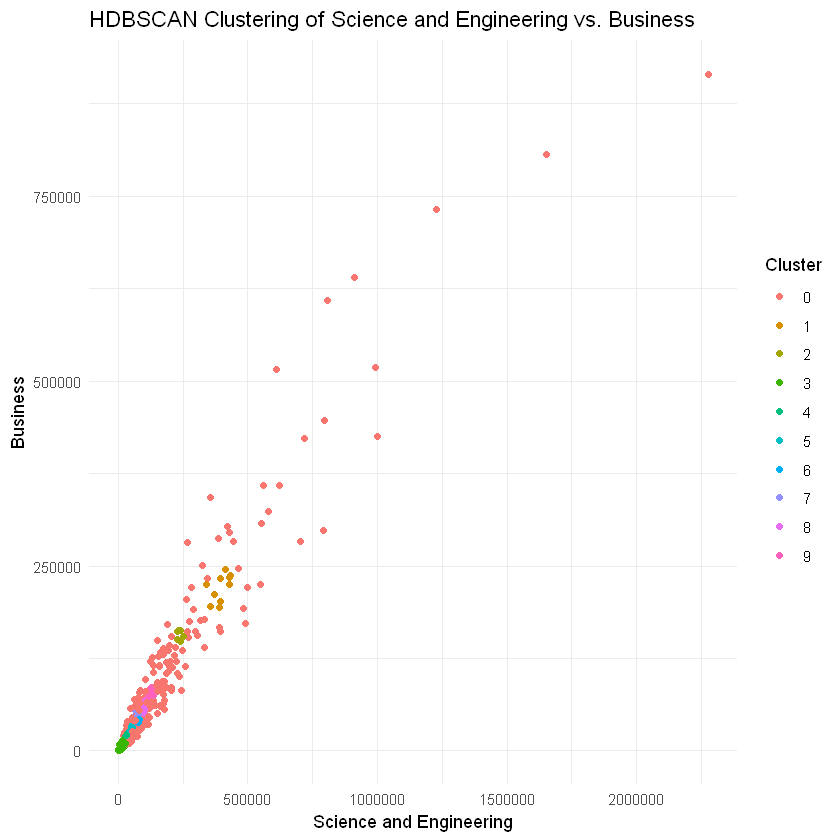

In [38]:
# Plot the clusters
ggplot(data, aes(x = Science.and.Engineering, y = Business, color = cluster)) +
  geom_point() +
  labs(title = "HDBSCAN Clustering of Science and Engineering vs. Business",
       x = "Science and Engineering",
       y = "Business") +
  scale_color_discrete(name = "Cluster") +
  theme_minimal()

# Assignment 4: Clustering (Optional)